In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#MUST HAVE:#has trend #has seasonality #its not random
#CAPTURE:#level #trend#seasonality

In [2]:
df = pd.read_csv('dailysales.csv',parse_dates=['date'])#step1:read csv

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [5]:
df.isnull().sum() #step2:no missing value


date     0
sales    0
dtype: int64


In [6]:
df = df.groupby('date').sum()#step3 data structure required for time series

In [7]:
df.head(10)

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0
2018-01-06,385.0
2018-01-07,492.0
2018-01-08,473.0
2018-01-09,249.0


In [8]:
df = df.resample(rule='MS').sum()
df.head(10)

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0
2018-03-01,13143.0
2018-04-01,12427.0
2018-05-01,8133.0
2018-06-01,7437.0
2018-07-01,11758.0
2018-08-01,9992.0
2018-09-01,7216.0


<AxesSubplot:xlabel='date'>

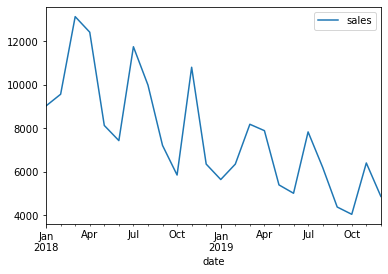

In [9]:
df.plot()

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


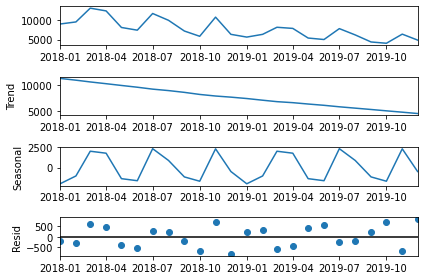

In [24]:
seasonal_decompose(df,model='additive',extrapolate_trend=4).plot();

In [26]:
train = df[:20]
test=df[19:]


In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [28]:
hwmodel=ExponentialSmoothing(train.sales,trend='add',seasonal='mul',seasonal_periods=4).fit()

In [29]:
test_pred=hwmodel.forecast(5)

In [32]:
test_pred

2019-09-01    4315.313500
2019-10-01    4120.855682
2019-11-01    6203.303383
2019-12-01    5132.606832
2020-01-01    3540.786590
Freq: MS, dtype: float64

<AxesSubplot:xlabel='date'>

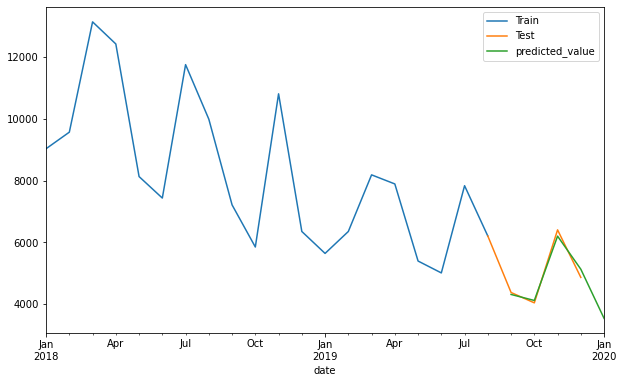

In [35]:
train['sales'].plot(legend=True,label='Train',figsize=(10,6))
test['sales'].plot(legend=True,label='Test')
test_pred.plot(legend=True,label='predicted_value')

In [ ]:
#model evaluation


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
np.sqrt(mean_squared_error(test,test_pred))#error

1529.2918465812168

In [39]:
df.sales.mean(),np.sqrt(df.sales.var()) #error within 1 sd => good model

(7665.204166666666, 2549.757117414906)

In [45]:
final_model = ExponentialSmoothing(df.sales,trend='add',seasonal='mul',seasonal_periods=4).fit()


In [46]:
pred=final_model.forecast(4)

In [47]:
pred

2020-01-01    3520.395179
2020-02-01    3317.506912
2020-03-01    4984.475046
2020-04-01    4045.418391
Freq: MS, dtype: float64

<AxesSubplot:xlabel='date'>

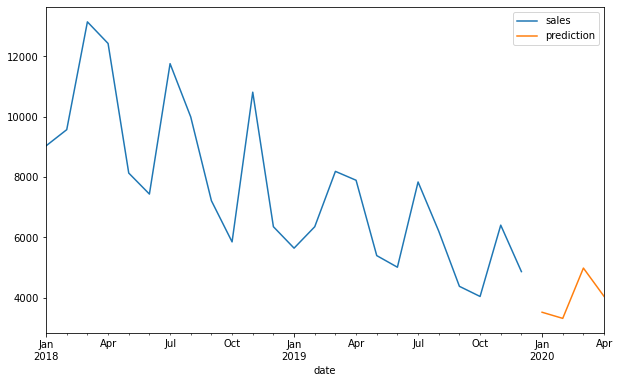

In [48]:
df['sales'].plot(legend=True,label='sales',figsize=(10,6))
pred.plot(legend=True,label='prediction')